Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding
4. Apply scaling
5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
6. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

In [1]:
import pandas as pd

df = pd.read_csv("heart.csv")

df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
160,59,M,ASY,140,264,1,LVH,119,Y,0.0,Flat,1
611,62,M,TA,135,139,0,ST,137,N,0.2,Up,0
640,48,F,NAP,130,275,0,Normal,139,N,0.2,Up,0
388,55,M,ASY,140,0,0,Normal,83,N,0.0,Flat,1


In [2]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Text(0, 0.5, 'Frequency0')

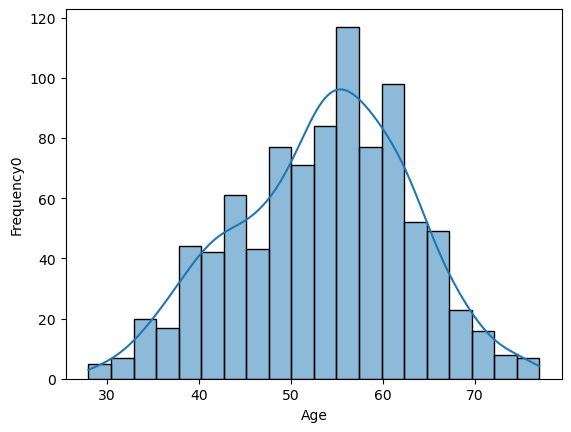

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df.Age, bins=20, kde=True)

plt.xlabel("Age")
plt.ylabel("Frequency0")

In [4]:
numeric_columns = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]

# Compute z-scores and add them as new columns
for col in numeric_columns:
    df[f"{col}_zscore"] = (df[col] - df[col].mean())/df[col].std()

# Filter outliers (z scores between -3 and 3)
df_no_outliers = df.copy()
for col in numeric_columns:
    df_no_outliers = df_no_outliers[(df_no_outliers[f"{col}_zscore"] > -3) & (df_no_outliers[f"{col}_zscore"] < 3)]

print(df_no_outliers.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Age_zscore  \
0              N      0.0       Up             0   -1.432359   
1              N      1.0     Flat             1   -0.478223   
2              N      0.0       Up             0   -1.750404   
3              Y      1.5     Flat             1   -0.584238   
4              N      0.0       Up             0    0.051853   

   RestingBP_zscore  Cholesterol_zscore  FastingBS_zscore  MaxHR_zscore  \
0          0.410685            0.824621         -0.55

In [13]:
df_no_outliers.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_zscore,RestingBP_zscore,Cholesterol_zscore,FastingBS_zscore,MaxHR_zscore,Oldpeak_zscore,HeartDisease_zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,-1.432359,0.410685,0.824621,-0.551041,1.382175,-0.831979,-1.112508
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.478223,1.490940,-0.171867,-0.551041,0.753746,0.105606,0.897891
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.750404,-0.129442,0.769768,-0.551041,-1.524307,-0.831979,-1.112508
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.584238,0.302660,0.138964,-0.551041,-1.131539,0.574398,0.897891
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.051853,0.950812,-0.034736,-0.551041,-0.581664,-0.831979,-1.112508


In [14]:
from sklearn.preprocessing import LabelEncoder

text_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# Apply label encoders
label_encoders = {}
for col in text_columns:
    le = LabelEncoder()
    df_no_outliers[col] = le.fit_transform(df_no_outliers[col])
    label_encoders[col] = le

In [15]:
print(df_no_outliers.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  Age_zscore  \
0    172               0      0.0         2             0   -1.432359   
1    156               0      1.0         1             1   -0.478223   
2     98               0      0.0         2             0   -1.750404   
3    108               1      1.5         1             1   -0.584238   
4    122               0      0.0         2             0    0.051853   

   RestingBP_zscore  Cholesterol_zscore  FastingBS_zscore  MaxHR_zscore  \
0          0.410685    

In [16]:
df_no_outliers.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_zscore,RestingBP_zscore,Cholesterol_zscore,FastingBS_zscore,MaxHR_zscore,Oldpeak_zscore,HeartDisease_zscore
382,43,1,0,115,0,0,1,145,1,2.0,1,1,-1.114314,-0.939633,-1.817444,-0.551041,0.321702,1.043191,0.897891
37,41,0,1,110,250,0,2,142,0,0.0,2,0,-1.326344,-1.209697,0.468079,-0.551041,0.203871,-0.831979,-1.112508
275,59,1,2,180,213,0,1,100,0,0.0,2,0,0.581928,2.571194,0.129822,-0.551041,-1.445754,-0.831979,-1.112508
814,77,1,0,125,304,0,0,162,1,0.0,2,1,2.490201,-0.399506,0.961752,-0.551041,0.989407,-0.831979,0.897891
555,58,1,2,150,219,0,2,118,1,0.0,1,1,0.475913,0.950812,0.184674,-0.551041,-0.738771,-0.831979,0.897891


<Axes: xlabel='Age', ylabel='Count'>

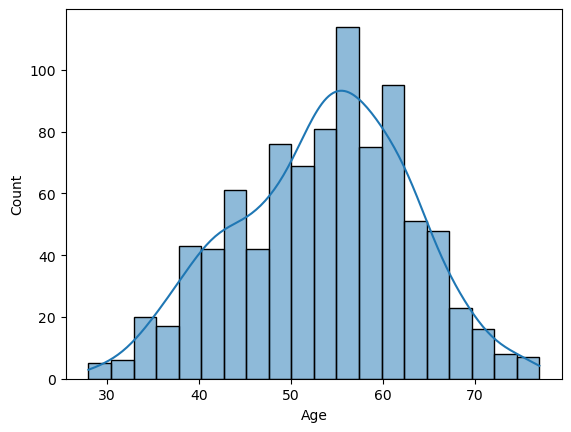

In [17]:
sns.histplot(df_no_outliers.Age, kde=True, bins=20)

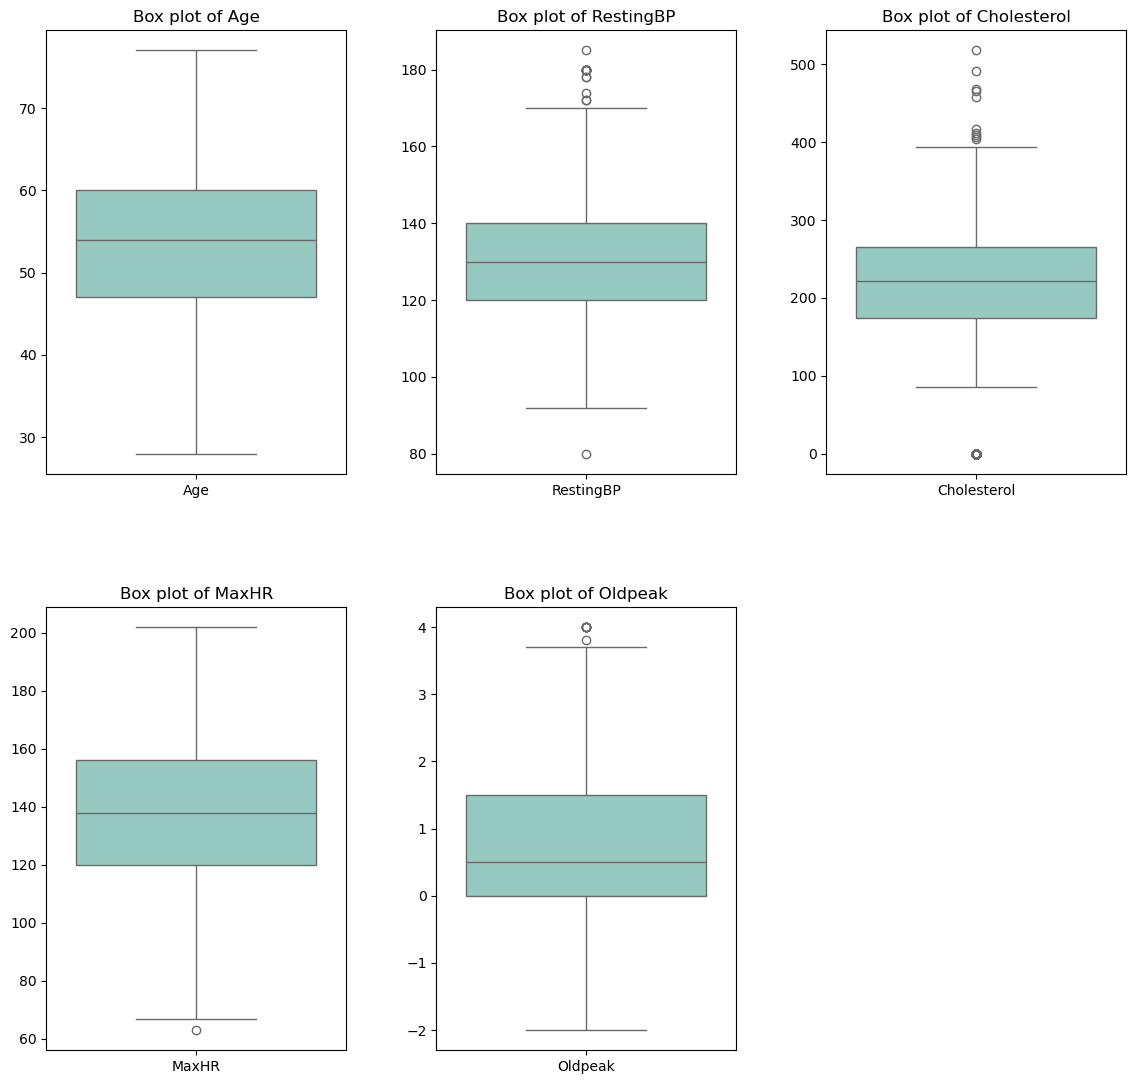

In [19]:
def plot_boxplots(df, cols, num_cols=4, figsize=(15, 6)):
    """
    Create boxplots for specified numerical columns in a DataFrame.

    This function creates individual boxplots for a list of numerical columns in a 
    DataFrame. The plots are arranged in a grid layout, with customizable grid dimensions 
    and figure size.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        cols (list): List of column names for which boxplots are to be created.
        num_cols (int, optional): Number of columns in the subplot grid. Default is 4.
        figsize (tuple, optional): Size of the entire figure. Default is (15, 6).
    
    Returns:
        None: The function directly displays the boxplots using `matplotlib.pyplot.show()` 
            and does not return any value.

    """
    num_rows = (len(cols) - 1) // num_cols + 1  # Calculate number of rows required
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(figsize[0], figsize[1] * num_rows))

    # Flatten axes array for iteration
    axes = axes.flatten()

    # Plot boxplots for each column
    for i, col in enumerate(cols):
        sns.boxplot(data=df[[col]], ax=axes[i], palette="Set3")
        axes[i].set_title(f"Box plot of {col}")

    # Remove unused subplots
    for i in range(len(cols), len(axes)):
        fig.delaxes(axes[i])

    # Adjust spacing between subplots
    plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05, wspace=0.3, hspace=0.3)
    plt.show()

columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plot_boxplots(df_no_outliers, cols=columns_to_plot, num_cols=3, figsize=(12, 6))

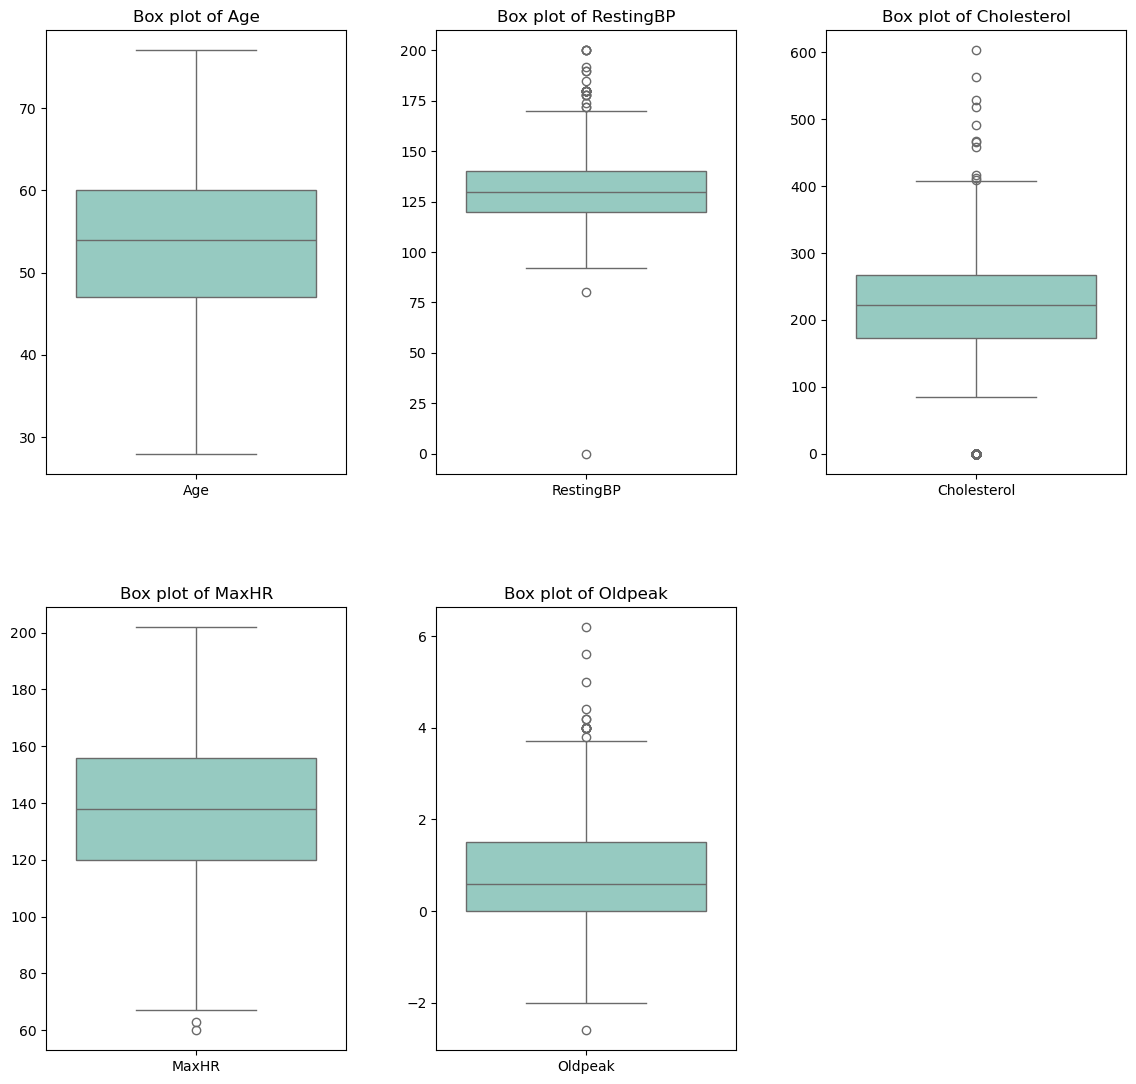

In [20]:
columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plot_boxplots(df, cols=columns_to_plot, num_cols=3, figsize=(12, 6))

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


numeric_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"] + text_columns

# Initialize scalers
standard_scalar = StandardScaler()
minmax_scalar = MinMaxScaler()

df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_columns] = minmax_scalar.fit_transform(df_minmax_scaled[numeric_columns])

print("Standardized DataFrame: \n", df_minmax_scaled.head())

Standardized DataFrame: 
         Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.244898  1.0       0.333333       0.70     0.479270          0   
1  0.428571  0.0       0.666667       0.80     0.298507          0   
2  0.183673  1.0       0.333333       0.65     0.469320          0   
3  0.408163  0.0       0.000000       0.69     0.354892          0   
4  0.530612  1.0       0.666667       0.75     0.323383          0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  \
0         0.5  0.788732             0.0  0.295455       1.0             0   
1         0.5  0.676056             0.0  0.409091       0.5             1   
2         1.0  0.267606             0.0  0.295455       1.0             0   
3         0.5  0.338028             1.0  0.465909       0.5             1   
4         0.5  0.436620             0.0  0.295455       1.0             0   

   Age_zscore  RestingBP_zscore  Cholesterol_zscore  FastingBS_zscore  \
0   -1.432359    

In [23]:
df_minmax_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_zscore,RestingBP_zscore,Cholesterol_zscore,FastingBS_zscore,MaxHR_zscore,Oldpeak_zscore,HeartDisease_zscore
0,0.244898,1.0,0.333333,0.70,0.479270,0,0.5,0.788732,0.0,0.295455,1.0,0,-1.432359,0.410685,0.824621,-0.551041,1.382175,-0.831979,-1.112508
1,0.428571,0.0,0.666667,0.80,0.298507,0,0.5,0.676056,0.0,0.409091,0.5,1,-0.478223,1.490940,-0.171867,-0.551041,0.753746,0.105606,0.897891
2,0.183673,1.0,0.333333,0.65,0.469320,0,1.0,0.267606,0.0,0.295455,1.0,0,-1.750404,-0.129442,0.769768,-0.551041,-1.524307,-0.831979,-1.112508
3,0.408163,0.0,0.000000,0.69,0.354892,0,0.5,0.338028,1.0,0.465909,0.5,1,-0.584238,0.302660,0.138964,-0.551041,-1.131539,0.574398,0.897891
4,0.530612,1.0,0.666667,0.75,0.323383,0,0.5,0.436620,0.0,0.295455,1.0,0,0.051853,0.950812,-0.034736,-0.551041,-0.581664,-0.831979,-1.112508


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [30]:
X = df_minmax_scaled.drop(columns=["HeartDisease"])   # Features 
y = df_minmax_scaled["HeartDisease"]      # targets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize models
svm_model = SVC(random_state=42)
logistic_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [33]:
# Train model
svm_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions
svm_preds = svm_model.predict(X_test)
logistic_preds = logistic_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [36]:
# Evaluate models
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))
print("\nAccuracy:", accuracy_score(y_test, svm_preds))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_preds))
print("\nAccuracy:", accuracy_score(y_test, logistic_preds))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("\nAccuracy:", accuracy_score(y_test, rf_preds))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184


Accuracy: 1.0
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184


Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00  

In [41]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [43]:
# Check explained variance to choose the number of components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

# Choose number of components that explain ~95% of variance
n_components = (cumulative_variance >= 0.95).argmax() + 1
print(f"Number of components to retain: {n_components}")

Cumulative Explained Variance: [0.27643743 0.42365571 0.53454554 0.62757164 0.70524793 0.7748055
 0.82685014 0.87322276 0.91682865 0.95204947 0.97979796 1.
 1.         1.         1.         1.         1.         1.        ]
Number of components to retain: 10


In [44]:
# Reduce dimensions to n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Retrain models with PCA data
svm_model.fit(X_train_pca, y_train)
logistic_model.fit(X_train_pca, y_train)
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [45]:

# Evaluate models
for model, name in zip([svm_model, logistic_model, rf_model], ["SVM", "Logistic Regression", "Random Forest"]):
    y_pred = model.predict(X_test_pca)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        77
           1       0.95      0.93      0.94       107

    accuracy                           0.93       184
   macro avg       0.93      0.93      0.93       184
weighted avg       0.94      0.93      0.93       184

Accuracy: 0.9348

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        77
           1       0.95      0.91      0.93       107

    accuracy                           0.92       184
   macro avg       0.91      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

Accuracy: 0.9185

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        77
           1       0.94      0.90      0.92       107

    accuracy                          